In [2]:
import numpy as np
import time
import pandas as pd 
import matplotlib.pyplot as plt
import math 
import random
import scipy.io as spio
import collections
from sklearn.cluster import DBSCAN 

# from google.colab import drive
# drive.mount("/content/drive")

columns = ['coluna 1', 'coluna 2']
train = pd.read_csv("cluster.dat", decimal=".", sep=' ', names=columns)
eps = 0.005
minpts = 10

In [65]:
def normalize(data):
  normData = data.copy()
  for i in range(data.shape[1]):
    normData.iloc[:,i] /= np.linalg.norm(data.iloc[:,i])
  return normData

In [4]:
def ExpandClusters(data, points_labels, id_seed, neighbor_points, C, epsilon, min_pts):
    # coloca o id do cluster no ponto atual
    points_labels[id_seed] = C
   
    i = 0
    while i < len(neighbor_points):        
        next_position = neighbor_points[i]
        if points_labels[next_position] == -1:
           points_labels[next_position] = C
        
        # se o ponto vizinho ainda nao tinha cluster agora ele tem
        elif points_labels[next_position] == 0:
            points_labels[next_position] = C
            
            pn_neighbor = [i for i in range(len(data)) if np.linalg.norm(data[i,:]-data[next_position,:]) <= epsilon]
            #se o ponto tem filhos, adiciona eles na fila 
            if len(pn_neighbor) >= min_pts:
                neighbor_points = neighbor_points + pn_neighbor
            
        i += 1

In [5]:
def effDBSCAN(data, epsilon, minP):
  C = 0
  point_label = np.zeros(len(data),dtype=int) 

  for p in range(len(data)):
    if point_label[p] != 0: continue
    current_point = data[p]
    # armazena os pontos vizinhos ao ponto p.
    neighbor_points = [i for i in range(len(data)) if np.linalg.norm(data[i,:]-current_point) <= epsilon]
  
    # o ponto nao tem vizinhos o suficiente
    if len(neighbor_points) < minP:
      point_label[p] = -1
    # tem vizinhos o suficiente para criar um novo clusters
    else:
      C += 1
      ExpandClusters(data, point_label, p, neighbor_points, C, epsilon, minP)

  return point_label


In [6]:
#Function to plot final result
def plotRes(train, point_labels, main_title):
  dicColors = {0:'black', 1:'orange', 2:'purple', 3:'red', 4:'blue', 5:'green', 
              6:'yellow', 7:'violet', 8:'brown'}    
  label_color = [dicColors[c%9] for c in point_labels] 
  x_label = 'x axis'
  y_label = 'y axis'
  title = main_title 
  plt.figure(figsize=(15,15))
  plt.scatter(train.iloc[:,0],train.iloc[:,1],c=label_color,alpha=0.3)
  plt.suptitle(title, fontsize=20)
  plt.suptitle(title, fontsize=20)  
  plt.suptitle(title, fontsize=20)  
  plt.savefig(title + '.png')
  plt.show()

In [7]:
def callPlot(train_data,pointlabel, main_title):
  cl = len(pointlabel)
  plotRes(train_data, pointlabel, main_title) 
  plt.show()
  print('number of cluster found: ' + str(cl-1))
  counter=collections.Counter(pointlabel)
  print(counter)
  outliers  = np.count_nonzero(pointlabel == 0)
  print('number of outliers found: '+str(outliers) +'\n')

In [39]:
def main():
  normTrain = normalize(train)
  print('Set epsilon (normalized radius) = ' +str(eps)+ ', Min Points = '+str(minpts))
  start_time = time.time()

  normT = normTrain.to_numpy()
  pt_label = effDBSCAN(normT,eps,minpts)
  print("--- %s seconds ---" % (time.time() - start_time))
  callPlot(train,pt_label,
          'TRIAL Clusters division applying method DBSCAN (epsilon 0.05) - data from cluster.dat')

Set epsilon (normalized radius) = 0.005, Min Points = 10
--- 2.3559956550598145 seconds ---


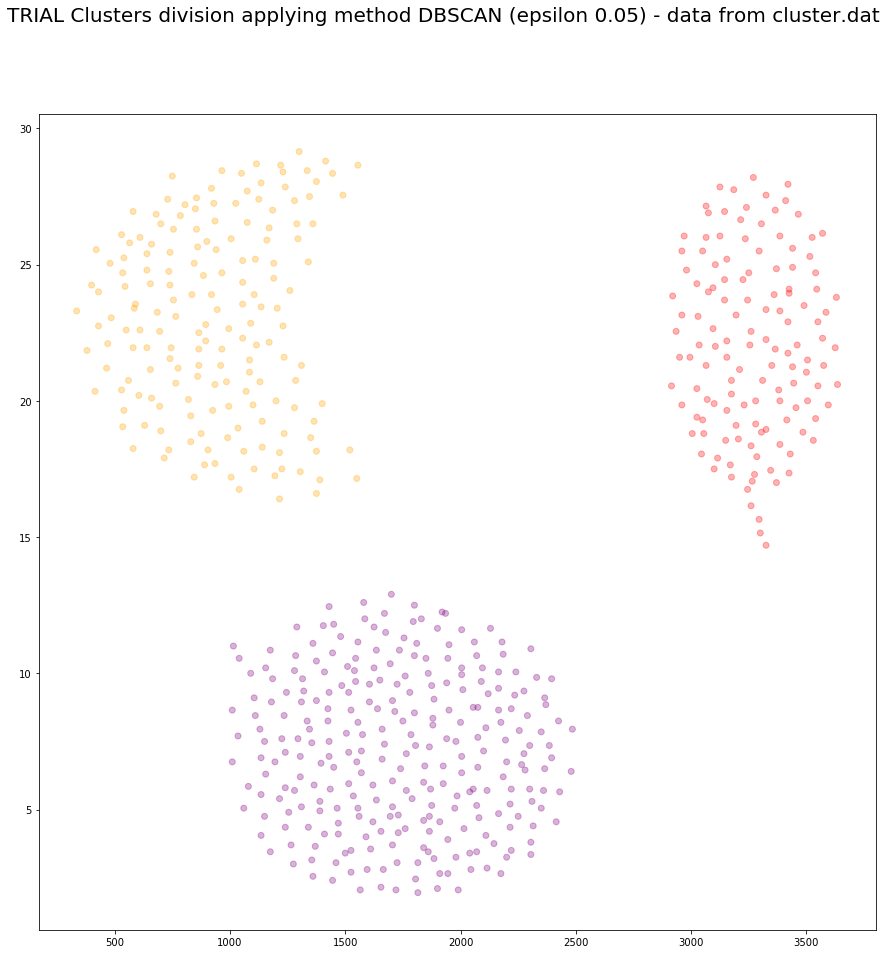

number of cluster found: 572
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0



In [66]:
main()

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 0


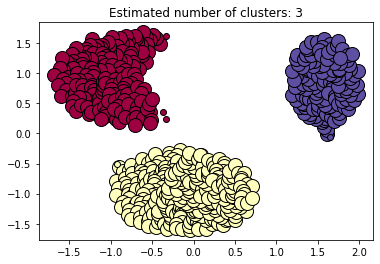

In [373]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
X = StandardScaler().fit_transform(train)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()